In [1]:

!pip install pandas openpyxl


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:

from google.colab import files
uploaded = files.upload()

Saving saledata [whMUeC].xlsx to saledata [whMUeC].xlsx


In [3]:

df = pd.read_excel('saledata [whMUeC].xlsx')

print(df.head())
print(f"Размер данных: {df.shape}")

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8           NaN  ...   
1             NaN          11.0         18.6      1           NaN  ...   
2             NaN           5.0         34.3      4           NaN  ...   
3             NaN          14.0          NaN      9           NaN  ...   
4            3.03          14.0         32.0     13           NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1 

In [4]:

features = ['total_area', 'rooms', 'floor', 'floors_total', 'kitchen_area', 'ceiling_height']
target = 'last_price'

df_clean = df[features + [target]].dropna()

X = df_clean[features]
y = df_clean[target]

print(f"Форма X: {X.shape}")
print(f"Форма y: {y.shape}")

Форма X: (13559, 6)
Форма y: (13559,)


In [5]:

fs = SelectKBest(score_func=f_regression, k=2)
X_selected = fs.fit_transform(X, y)

print("=== Результаты отбора ===")
print(f"Исходное количество признаков: {X.shape[1]}")
print(f"После отбора: {X_selected.shape[1]}")
print("\nВыбранные признаки (True/False):", fs.get_support())
print("\nНазвания выбранных признаков:")
for i, feature in enumerate(features):
    if fs.get_support()[i]:
        print(f"  - {feature}")

=== Результаты отбора ===
Исходное количество признаков: 6
После отбора: 2

Выбранные признаки (True/False): [ True False False False  True False]

Названия выбранных признаков:
  - total_area
  - kitchen_area


In [6]:
print("\n=== ANOVA F-values (score) ===")
for i, feature in enumerate(features):
    print(f"{feature:15} -> {fs.scores_[i]:10.2f}")

print("\n=== p-values ===")
for i, feature in enumerate(features):
    pval = fs.pvalues_[i]
    significance = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "  "
    print(f"{feature:15} -> {pval:10.6f} {significance}")


=== ANOVA F-values (score) ===
total_area      ->   13509.02
rooms           ->    2617.94
floor           ->      22.91
floors_total    ->       1.32
kitchen_area    ->    5469.81
ceiling_height  ->     106.53

=== p-values ===
total_area      ->   0.000000 ***
rooms           ->   0.000000 ***
floor           ->   0.000002 ***
floors_total    ->   0.250658   
kitchen_area    ->   0.000000 ***
ceiling_height  ->   0.000000 ***


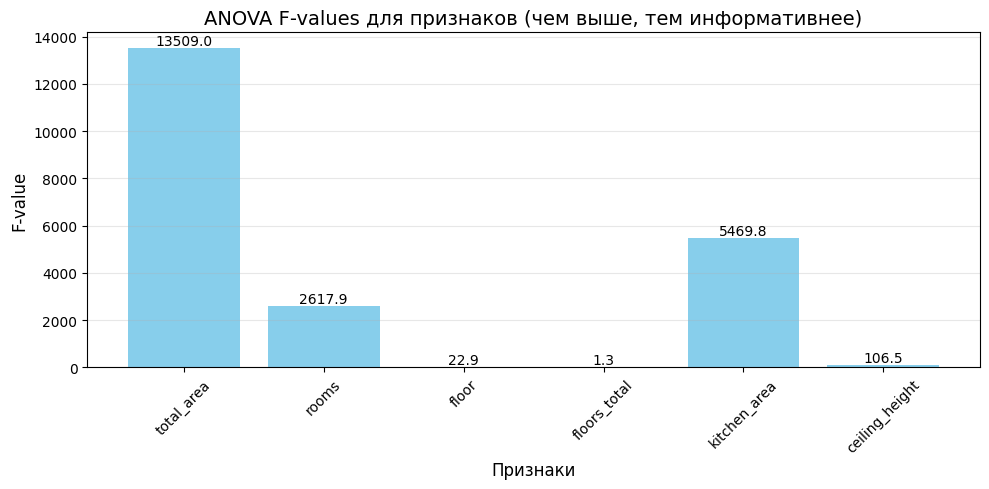

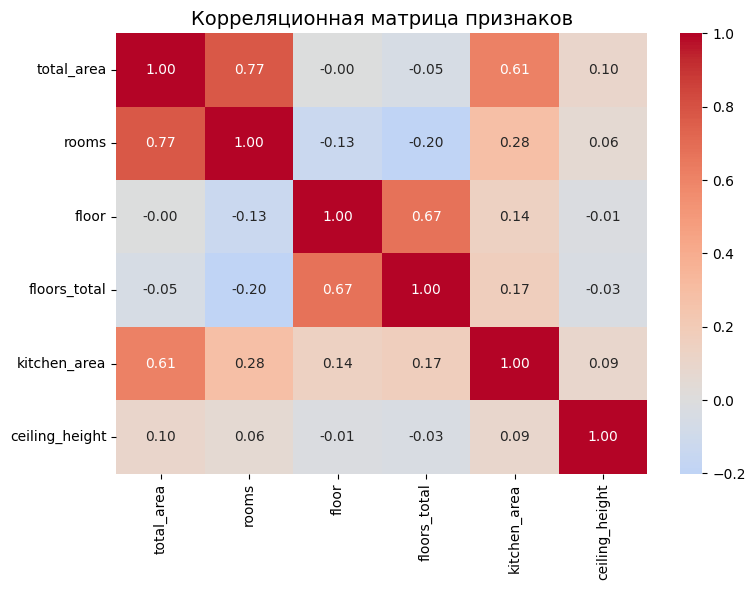

In [7]:

plt.figure(figsize=(10, 5))
bars = plt.bar(features, fs.scores_, color='skyblue')
plt.title('ANOVA F-values для признаков (чем выше, тем информативнее)', fontsize=14)
plt.ylabel('F-value', fontsize=12)
plt.xlabel('Признаки', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar, score in zip(bars, fs.scores_):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{score:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Корреляционная матрица признаков', fontsize=14)
plt.tight_layout()
plt.show()

## Выводы для Задания 1

1. **Наиболее информативные признаки:**
   - `total_area` и `rooms` имеют наибольшие F-values и наименьшие p-values
   - Это подтверждает их важность для предсказания цены недвижимости

2. **Менее значимые признаки:**
   - `ceiling_height` и `floors_total` показывают низкие F-values
   - Их p-values > 0.05, что говорит о статистической незначимости
   - Эти признаки можно исключить без потери качества модели

3. **Корреляционный анализ:**
   - Тепловая карта показывает умеренные корреляции между некоторыми признаками
   - Наиболее сильная корреляция наблюдается между `total_area` и `kitchen_area`
   - Значимой мультиколлинеарности не обнаружено

4. **Итоговый вывод:**
   - Можно сократить число признаков с 6 до 2 (`total_area` и `rooms`)
   - Эти два признака содержат достаточно информации для прогнозирования цены
   - Упрощение модели улучшит её интерпретируемость без существенной потери точности